# Abhi Devgirikar
# Task_2 is to predict the percentage of marks of an students based on the number of study hours
This is a Simple Linear Regression Task as it involves just 2 variables

Dataset link- https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing data
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'Independent Variable Percentage Scores')

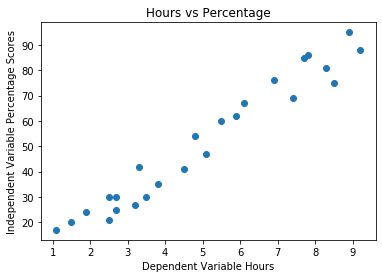

In [3]:
#Visualizing our data using matplotlib 
plt.scatter(x =df["Hours"], y=df["Scores"])
plt.title("Hours vs Percentage")
plt.xlabel("Dependent Variable Hours")
plt.ylabel("Independent Variable Percentage Scores")

In [4]:
#importing library for train_test_split (splitting the data)
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop("Scores",axis=1) #independent variable
y = df["Scores"] #dependent variable
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51 )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


# Training Model
using training data

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
print("Model Trained!!")

Model Trained!!


In [9]:
print(lr_model.coef_)
print(lr_model.intercept_)

[9.61405732]
3.370382388693166


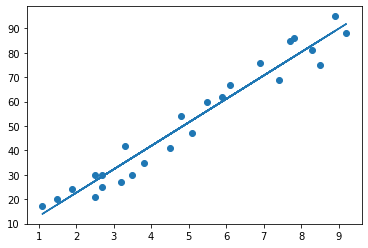

In [10]:
line = lr_model.coef_*X + lr_model.intercept_

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Making Predictions 
on test data

In [11]:
y_pred = lr_model.predict(X_test)
y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

In [12]:
y_test

7     60
10    85
23    76
8     81
20    30
1     47
19    69
2     27
Name: Scores, dtype: int64

In [13]:
#comparing y_pred and y_test
dff = pd.DataFrame({"actual":y_test,"Predicted":y_pred})
dff

,actual,Predicted
7,60,56.247698
10,85,77.398624
23,76,69.707378
8,81,83.167058
20,30,29.328337
1,47,52.402075
19,69,74.514407
2,27,34.135366


In [14]:
#Testing with our own data
hours = 9.25
own_pred = lr_model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.3004125718524


# Evaluating the Model

In [15]:
#to check error by root mean square
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

28.38869937955701
5.32810467047683


In [16]:
#r2_square test to check accuracy 

from sklearn.metrics import r2_score
acc = r2_score(y_test,y_pred)
acc

0.9361670674106156

93.61 accuracy

# Trying Ridge and Lasso Regression for better accuracy

In [17]:
#importing Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso 
rd = Ridge(alpha=1)
rd.fit(X_train,y_train)

rd.score(X_test, y_test)

0.9349575169644812

93.49% accuracy (almost no difference)

In [18]:
ls = Lasso(alpha=1)
ls.fit(X_train,y_train)

ls.score(X_test, y_test)

0.9338926900306666

Here too, almost no difference 93.38%